<a href="https://colab.research.google.com/github/tesseract314/DS-Unit-4-Sprint-4-Deep-Learning/blob/master/LS_DS_Unit_4_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

## *Data Science Unit 4 Sprint 4*

# Sprint Challenge
### RNNs, CNNs, GANS, and AutoML

In this Sprint Challenge, you'll explore some of the cutting edge of Data Science. *Caution* - these approaches can be pretty heavy computationally. All problems are designed to completed with 5-10 minutes of run time on most machines. If you approach takes longer, please double check your work. 

## Part 1 - RNNs

Use an RNN to fit a classification model on tweets to distinguish from tweets from any two accounts. The following code sample illustrates how to access data from an account (no API auth needed, uses [twitterscraper](https://github.com/taspinar/twitterscraper): 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import tensorflow as tf
import tensorflow_hub as hub
import imageio
from skimage import color, io

In [4]:
!pip install twitterscraper

  Stored in directory: /root/.cache/pip/wheels/45/50/9b/70128bca07e2bf8b5ed3f504002e9e74a6eaa5e756341b6931
Successfully built twitterscraper


In [5]:
from twitterscraper import query_tweets

austen_tweets = query_tweets('from:austen',1000)
len(austen_tweets)

INFO: queries: ['from:austen since:2006-03-21 until:2006-11-16', 'from:austen since:2006-11-16 until:2007-07-14', 'from:austen since:2007-07-14 until:2008-03-10', 'from:austen since:2008-03-10 until:2008-11-06', 'from:austen since:2008-11-06 until:2009-07-04', 'from:austen since:2009-07-04 until:2010-03-01', 'from:austen since:2010-03-01 until:2010-10-27', 'from:austen since:2010-10-27 until:2011-06-25', 'from:austen since:2011-06-25 until:2012-02-20', 'from:austen since:2012-02-20 until:2012-10-17', 'from:austen since:2012-10-17 until:2013-06-14', 'from:austen since:2013-06-14 until:2014-02-10', 'from:austen since:2014-02-10 until:2014-10-08', 'from:austen since:2014-10-08 until:2015-06-05', 'from:austen since:2015-06-05 until:2016-01-31', 'from:austen since:2016-01-31 until:2016-09-28', 'from:austen since:2016-09-28 until:2017-05-26', 'from:austen since:2017-05-26 until:2018-01-21', 'from:austen since:2018-01-21 until:2018-09-18', 'from:austen since:2018-09-18 until:2019-05-17']
I051

182

In [6]:
austen_tweets[0].text

'I love love love working with great people.pic.twitter.com/fCKOm6Vl'

In [7]:
# getting elon musk tweets
elon_tweets = query_tweets('from:elonmusk',1000)
len(elon_tweets)

INFO: queries: ['from:elonmusk since:2006-03-21 until:2006-11-16', 'from:elonmusk since:2006-11-16 until:2007-07-14', 'from:elonmusk since:2007-07-14 until:2008-03-10', 'from:elonmusk since:2008-03-10 until:2008-11-06', 'from:elonmusk since:2008-11-06 until:2009-07-04', 'from:elonmusk since:2009-07-04 until:2010-03-01', 'from:elonmusk since:2010-03-01 until:2010-10-27', 'from:elonmusk since:2010-10-27 until:2011-06-25', 'from:elonmusk since:2011-06-25 until:2012-02-20', 'from:elonmusk since:2012-02-20 until:2012-10-17', 'from:elonmusk since:2012-10-17 until:2013-06-14', 'from:elonmusk since:2013-06-14 until:2014-02-10', 'from:elonmusk since:2014-02-10 until:2014-10-08', 'from:elonmusk since:2014-10-08 until:2015-06-05', 'from:elonmusk since:2015-06-05 until:2016-01-31', 'from:elonmusk since:2016-01-31 until:2016-09-28', 'from:elonmusk since:2016-09-28 until:2017-05-26', 'from:elonmusk since:2017-05-26 until:2018-01-21', 'from:elonmusk since:2018-01-21 until:2018-09-18', 'from:elonmusk 

722

Your Tasks:
* Select two twitter accounts to gather data from
* Use twitterscraper to get ~1,000 tweets from each account
* Encode the characters to a sequence of integers for the model
* Get the data into the appropriate shape/format, including labels and a train/test split
* Use Keras to fit a predictive model, classying tweets as being from one acount or the other
* Report your overall score and accuracy

For reference, the [Keras IMDB classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the RNN code we used in class.

Note - focus on getting a running model, not on making accuracy with extreme data size or epoch numbers. Fit a baseline model based on tweet text. Only revisit and push accuracy or incorporate additional features if you get everything else done!

In [8]:
# get text of both sets of tweets
austen_tweets = [t.text for t in austen_tweets]
elon_tweets = [t.text for t in elon_tweets]
austen_tweets

['I love love love working with great people.pic.twitter.com/fCKOm6Vl',
 'I love love love working with great people.pic.twitter.com/fCKOm6Vl',
 'Today for all-hands we watched a video of Aaron, a 47-year-old military chaplain now turned software engineer.\n\nThe company that hired him less than a year ago has now hired 8 more Lambda School students.',
 'Other people who were creating wealth. And we exchange wealth with trade.',
 "Sounds like by definition it's not a relative measure then",
 'Is the world more wealthy than it was 10 million years ago? Obviously, yes.\n\nHow is that possible?',
 "I'd love to see data around what robocalling has done to phone pickups generally. \n\nI just never answer the phone anymore. Telemarketing must be getting hammered.",
 'The tweet wasn’t about Lambda School',
 'You’re assuming I’m talking about myself',
 'This ^',
 'False',
 'What email did you send them from/to? DM me',
 'Western economies grew as much in percentage terms between 1950 and 1970 

In [9]:
tweets_list = austen_tweets + elon_tweets # combine all tweets
tweets_str = '' # make empty string to put tweets in
for tweet in tweets_list: # put tweets in string
  tweets_str += tweet
    
print(tweets_str)

I love love love working with great people.pic.twitter.com/fCKOm6VlI love love love working with great people.pic.twitter.com/fCKOm6VlToday for all-hands we watched a video of Aaron, a 47-year-old military chaplain now turned software engineer.

The company that hired him less than a year ago has now hired 8 more Lambda School students.Other people who were creating wealth. And we exchange wealth with trade.Sounds like by definition it's not a relative measure thenIs the world more wealthy than it was 10 million years ago? Obviously, yes.

How is that possible?I'd love to see data around what robocalling has done to phone pickups generally. 

I just never answer the phone anymore. Telemarketing must be getting hammered.The tweet wasn’t about Lambda SchoolYou’re assuming I’m talking about myselfThis ^FalseWhat email did you send them from/to? DM meWestern economies grew as much in percentage terms between 1950 and 1970 as they did between 500 and 1500.

(http://www.ggdc.net/maddison/art

In [10]:
chars = list(set(tweets_str)) # remove duplicate chars and split chars

num_chars = len(chars) # the number of unique characters
txt_data_size = len(tweets_str) # the number of all characters

# print results
print("unique characters : ", num_chars)
print("txt_data_size : ", txt_data_size)

unique characters :  101
txt_data_size :  86063


In [11]:
char_to_int = dict((c, i) for i, c in enumerate(chars)) # assign ints to unique chars
char_to_int # see results

{'\n': 86,
 ' ': 60,
 '!': 38,
 '"': 97,
 '#': 45,
 '$': 6,
 '%': 76,
 '&': 18,
 "'": 77,
 '(': 78,
 ')': 69,
 '*': 85,
 '+': 66,
 ',': 79,
 '-': 12,
 '.': 74,
 '/': 91,
 '0': 5,
 '1': 72,
 '2': 35,
 '3': 54,
 '4': 75,
 '5': 32,
 '6': 63,
 '7': 25,
 '8': 2,
 '9': 23,
 ':': 39,
 ';': 30,
 '<': 100,
 '=': 52,
 '>': 93,
 '?': 80,
 '@': 40,
 'A': 42,
 'B': 44,
 'C': 59,
 'D': 98,
 'E': 43,
 'F': 82,
 'G': 0,
 'H': 19,
 'I': 16,
 'J': 27,
 'K': 34,
 'L': 29,
 'M': 26,
 'N': 57,
 'O': 89,
 'P': 41,
 'Q': 88,
 'R': 62,
 'S': 92,
 'T': 1,
 'U': 96,
 'V': 33,
 'W': 46,
 'X': 22,
 'Y': 49,
 'Z': 68,
 '^': 84,
 '_': 64,
 'a': 95,
 'b': 8,
 'c': 10,
 'd': 48,
 'e': 87,
 'f': 53,
 'g': 90,
 'h': 65,
 'i': 36,
 'j': 83,
 'k': 81,
 'l': 13,
 'm': 51,
 'n': 14,
 'o': 71,
 'p': 94,
 'q': 4,
 'r': 99,
 's': 20,
 't': 31,
 'u': 7,
 'v': 58,
 'w': 15,
 'x': 56,
 'y': 61,
 'z': 50,
 '|': 28,
 '~': 73,
 '\xa0': 67,
 '’': 70,
 '“': 37,
 '”': 3,
 '…': 21,
 '√': 17,
 'の': 24,
 '則': 9,
 '法': 11,
 '転': 47,
 '逆':

In [12]:
# put austen tweets into dataframe with a 1 representing his tweets
df_aus = pd.DataFrame({'tweets': austen_tweets, 'austen_or_elon': [1] * len(austen_tweets)})
df_aus.head()

,tweets,austen_or_elon
0,I love love love working with great people.pic...,1
1,I love love love working with great people.pic...,1
2,Today for all-hands we watched a video of Aaro...,1
3,Other people who were creating wealth. And we ...,1
4,Sounds like by definition it's not a relative ...,1


In [13]:
# put elon tweets into dataframe with a 0 representing his tweets
df_el = pd.DataFrame({'tweets': elon_tweets, 'austen_or_elon': [0] * len(elon_tweets)})
df_el.head()

,tweets,austen_or_elon
0,"Please ignore prior tweets, as that was someon...",0
1,"Please ignore prior tweets, as that was someon...",0
2,Battery storage of solar power needed for nigh...,0
3,A long way to go before most power generation ...,0
4,1st long duration firing of the new generation...,0


In [14]:
# concat both dataframes
df = pd.concat([df_aus, df_el])
print(df.shape[0] == (len(austen_tweets) + len(elon_tweets))) # check if all tweets are in df
df.head()

True


,tweets,austen_or_elon
0,I love love love working with great people.pic...,1
1,I love love love working with great people.pic...,1
2,Today for all-hands we watched a video of Aaro...,1
3,Other people who were creating wealth. And we ...,1
4,Sounds like by definition it's not a relative ...,1


In [15]:
# function to be applied to the 'tweets' series that encodes each char with the unique ints
def encode(s):
  integer_encoded = [char_to_int[i] for i in s]
  return integer_encoded

df['tweets'] = df['tweets'].apply(encode) # apply function
df.head() # see results

,tweets,austen_or_elon
0,"[16, 60, 13, 71, 58, 87, 60, 13, 71, 58, 87, 6...",1
1,"[16, 60, 13, 71, 58, 87, 60, 13, 71, 58, 87, 6...",1
2,"[1, 71, 48, 95, 61, 60, 53, 71, 99, 60, 95, 13...",1
3,"[89, 31, 65, 87, 99, 60, 94, 87, 71, 94, 13, 8...",1
4,"[92, 71, 7, 14, 48, 20, 60, 13, 36, 81, 87, 60...",1


In [0]:
# train_test_split
max_len = 280 # set max_length of tweet
X = sequence.pad_sequences(df['tweets'], max_len) # apply pad sequences to tweets and set to X variable
y = df['austen_or_elon'] # set y variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [17]:
# make model
max_features = 10000 # set max features var
model = Sequential() # model instance
model.add(Embedding(max_features, 128)) # add embedding
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) # add lstm
model.add(Dense(1, activation='sigmoid')) # output layer

# compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


W0517 17:13:42.676347 140050471462784 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


W0517 17:13:42.816655 140050471462784 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
# fit model and see score and acc
batch_size = 30
model.fit(X_train, y_train, batch_size=batch_size, epochs=15, validation_data=(X_test, y_test)) # fit model -- use validation data
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size) # get score and accuracy

# print results
print('Test score:', score)
print('Test accuracy:', acc)

Instructions for updating:
Use tf.cast instead.


W0517 17:13:43.353234 140050471462784 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 678 samples, validate on 226 samples
Epoch 1/15
678/678 [==============================] - 18s 26ms/step - loss: 0.5920 - acc: 0.7699 - val_loss: 0.5108 - val_acc: 0.8319
Epoch 2/15
678/678 [==============================] - 16s 24ms/step - loss: 0.4971 - acc: 0.7876 - val_loss: 0.4522 - val_acc: 0.8319
Epoch 3/15
678/678 [==============================] - 16s 24ms/step - loss: 0.4810 - acc: 0.7876 - val_loss: 0.4443 - val_acc: 0.8319
Epoch 4/15
678/678 [==============================] - 16s 24ms/step - loss: 0.4420 - acc: 0.7876 - val_loss: 0.4488 - val_acc: 0.8319
Epoch 5/15
678/678 [==============================] - 16s 24ms/step - loss: 0.4213 - acc: 0.8245 - val_loss: 0.4556 - val_acc: 0.8274
Epoch 6/15
678/678 [==============================] - 16s 24ms/step - loss: 0.4069 - acc: 0.8274 - val_loss: 0.4562 - val_acc: 0.8319
Epoch 7/15
678/678 [==============================] - 16s 24ms/step - loss: 0.3869 - acc: 0.8348 - val_loss: 0.4557 - val_acc: 0.8053
Epoch 8/15
678/6

## Part 2 - CNNs
Time to play "find the frog!" Use Keras and ResNet50 to detect which of the following images contain frogs:

In [19]:
!pip install google_images_download

     |████████████████████████████████| 911kB 7.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/22/f3/7b/d1d7a18d9784458622ef3f9702c0bdbc179b431adde169c1a0
Successfully built google-images-download


In [20]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {'keywords': "animal pond", "limit": 10, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1.Pondanimals.GIF
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://get.pxhere.com/photo/water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Completed Image ====> 3.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 4.PKLS4116_inline.png
Image URL: http://images.animalpicturesociety.com/images/5d/alligator_animal_on_pond.jpg
Completed Image ====> 5.alligator_animal_on_pond.jpg
Image URL: https://cdn.pixabay.com/photo/2017/04/19/20/37/frog-2243543_960_720.jpg
Completed Image ====> 6.frog-2243543_960_720.jpg
Image URL: h

At the time of writing at least a few do, but since the internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is validly run ResNet50 on the input images - don't worry about tuning or improving the model. 

*Hint:* ResNet 50 doesn't just return "frog". The three labels it has for frogs are bullfrog, tree frog, and tailed frog.

Stretch goal - also check for fish.

In [21]:
# get expected height and width for images
module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/3")
height, width = hub.get_expected_image_size(module)
height, width

(224, 224)

In [22]:
# get list of image paths
imgs = absolute_image_paths[0]['animal pond']
imgs

['/content/downloads/animal pond/1.Pondanimals.GIF',
 '/content/downloads/animal pond/2.hqdefault.jpg',
 '/content/downloads/animal pond/3.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg',
 '/content/downloads/animal pond/4.PKLS4116_inline.png',
 '/content/downloads/animal pond/5.alligator_animal_on_pond.jpg',
 '/content/downloads/animal pond/6.frog-2243543_960_720.jpg',
 '/content/downloads/animal pond/7.maxresdefault.jpg',
 '/content/downloads/animal pond/8.birds-in-a-pond-5986310798966784.jpg',
 '/content/downloads/animal pond/9.PKLS4116.png',
 '/content/downloads/animal pond/10.goose-2650209_960_720.jpg']

In [0]:
# function to process image
def process_img_path(img_path):
  return image.load_img(img_path, target_size=(height, width))

# function that shows the image predictions
def what_is_image(img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=3)[0]
  print(results)

40960/35363 [==================================] - 0s 2us/step
[('n03598930', 'jigsaw_puzzle', 0.86803216), ('n06359193', 'web_site', 0.06409976), ('n02834397', 'bib', 0.021264203)]


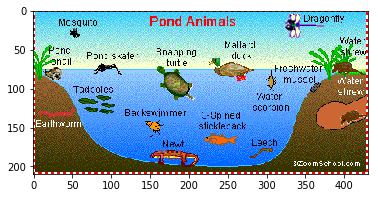

[('n01443537', 'goldfish', 0.849588), ('n01631663', 'eft', 0.06760151), ('n02536864', 'coho', 0.03516323)]


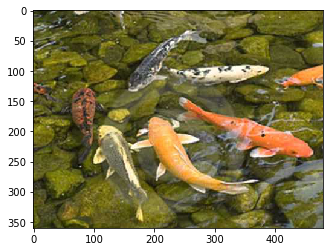

[('n02442845', 'mink', 0.30976495), ('n02363005', 'beaver', 0.23399015), ('n02361337', 'marmot', 0.20796911)]


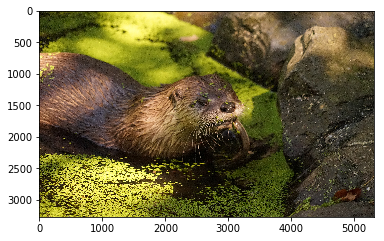

[('n04243546', 'slot', 0.8712441), ('n04476259', 'tray', 0.04993626), ('n03908618', 'pencil_box', 0.023072539)]


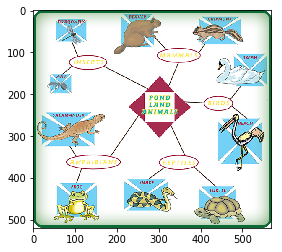

[('n01698640', 'American_alligator', 0.96394134), ('n01697457', 'African_crocodile', 0.026759887), ('n01737021', 'water_snake', 0.0059646657)]


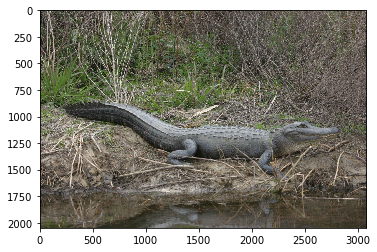

[('n01641577', 'bullfrog', 0.9223301), ('n01644900', 'tailed_frog', 0.07364731), ('n01644373', 'tree_frog', 0.0011781248)]


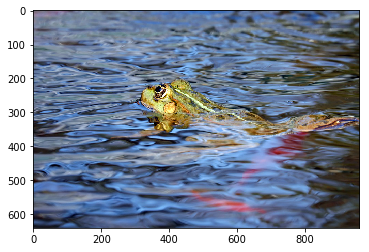

[('n02013706', 'limpkin', 0.35723644), ('n01806567', 'quail', 0.18107833), ('n02009229', 'little_blue_heron', 0.12651859)]


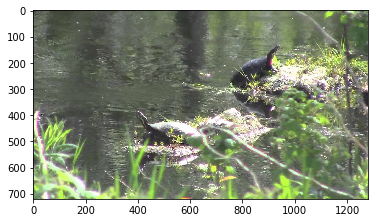

[('n02009912', 'American_egret', 0.7822412), ('n02012849', 'crane', 0.14339258), ('n02009229', 'little_blue_heron', 0.021143366)]


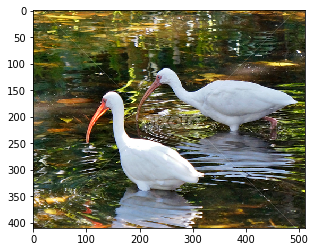

[('n03485794', 'handkerchief', 0.8822728), ('n02834397', 'bib', 0.022680853), ('n03291819', 'envelope', 0.020095272)]


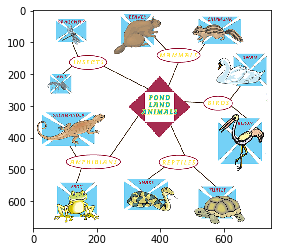

[('n01860187', 'black_swan', 0.8796095), ('n01847000', 'drake', 0.033984862), ('n01855032', 'red-breasted_merganser', 0.02897096)]


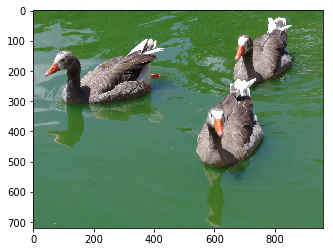

In [24]:
for i in imgs:
  proc_image = process_img_path(i)
  preds = what_is_image(proc_image)
  plt.figure()
  image_ = io.imread(i)
  plt.imshow(image_)
  plt.grid(False)
  plt.show()
  preds
  

In [0]:
# The CNN found the *real* pictures (2) of frogs and fish with high probabilities.
# The CNN did not do well with the drawings of frogs and fish.

## Part 3 - AutoML

Use [TPOT](https://epistasislab.github.io/tpot/) to fit a predictive model for the King County housing data, with `price` as the target output variable.

In [26]:
!pip install tpot

In [27]:
from tpot import TPOTRegressor

url = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv"
df = pd.read_csv(url)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


As with previous questions, your goal is to run TPOT and successfully run and report error at the end. Also, in the interest of time, feel free to choose small `generation=1`and `population_size=10` parameters, so your pipeline runs efficiently. You will want to be able to iterate and test. 

*Hint:* You will have to drop and/or type coerce at least a few variables to get things working. It's fine to err on the side of dropping to get things running - as long as you still get a valid model with reasonable predictive power. 

In [0]:
# drop some columns
df = df.drop(columns=['id', 'date'])

In [29]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [0]:
# split into X and y
X = df.drop(columns='price').values
y = df['price'].values

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [31]:
%time

# make TOPTRegressor model
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2)
#fit model
tpot.fit(X_train, y_train)
# print score for test data
print(tpot.score(X_test, y_test))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.54 µs


Generation 1 - Current best internal CV score: -18782150195.212368
Generation 2 - Current best internal CV score: -17161386933.348072
Generation 3 - Current best internal CV score: -17161386933.348072
Generation 4 - Current best internal CV score: -17161386933.348072
Generation 5 - Current best internal CV score: -16583826529.340637

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=8, min_child_weight=15, n_estimators=100, nthread=1, subsample=0.9000000000000001)
-16603287871.179356


## Part 4 - More... 

Answer the following questions, with a target audience of a fellow Data Scientist:
* What do you consider your strongest area as a Data Scientist? 
* What area of Data Science would you most like to learn more about and why? 
* Where do you think Data Science will be in 5 years? 

A few sentences per answer is fine. Only elaborate if time allows. Use markdown to format your answers.

Thank you for your hard, and congratulations!! You've learned a lot, and you should proudly call yourself a Data Scientist. 

### Answers

What do you consider your strongest area as a Data Scientist?

 - My strongest area as a Data Scientist is in both predictive modeling and storytelling. These are areas of data science that I was passionate about, and had experience with, before Lambda School. But Lambda School has enhanced these skills to a degree that would have taken me many years to achieve on my own.
 
 
 What area of Data Science would you most like to learn more about and why?
 
 - I would like to learn a lot more about machine learning. Computer Vision, Reinforcement Learning, NLP, and Neural Networks in general are extremely fascinating to me. I like to work on robotics in my spare time and I believe these tools would help me greatly in achieving some very exciting things in that field.
 
 
 Where do you think Data Science will be in 5 years?
 
 - Over the next five years, I believe Data Science will be used to automate more 'complex' physical tasks. For example, manufacturing, farming, driving, landscaping, and construction will be made much more efficient with Data Science. This vision is the reason I have become interested in robotics. Data Science will also be used in business and government to make more intelligent decisions. I am happy to help there as well :)